In [0]:
import sys
sys.path.append('/content/drive/My Drive/GAN')

In [260]:
import cv2
import glob
import numpy as np
from PIL import Image

images = []

files = glob.glob ("/content/drive/My Drive/GAN/images/*.jpg") # your image path
for myFile in files:
    image = cv2.imread(myFile)
    image = cv2.resize(image,dsize=(224, 224))
    images.append (image)
images = np.array(images,dtype='float32') #as mnist

print(images.shape)
images=torch.from_numpy(images)
print(images.dtype)
print(images.size())

(16, 224, 224, 3)
torch.float32
torch.Size([16, 224, 224, 3])


In [261]:
images=images.permute(0,3,1,2)
print(images.size())
print (images)

torch.Size([16, 3, 224, 224])
tensor([[[[188., 203., 199.,  ...,  49.,  50.,  39.],
          [203., 182., 181.,  ...,  46.,  52.,  56.],
          [159., 128., 122.,  ...,  58.,  62.,  75.],
          ...,
          [ 16.,  17.,  19.,  ...,  91.,  91.,  90.],
          [ 12.,  18.,  21.,  ...,  94.,  94.,  93.],
          [ 18.,  24.,  14.,  ...,  97.,  95.,  95.]],

         [[184., 198., 190.,  ...,  73.,  74.,  63.],
          [198., 176., 173.,  ...,  69.,  76.,  80.],
          [153., 121., 114.,  ...,  80.,  84.,  97.],
          ...,
          [ 21.,  22.,  24.,  ...,  73.,  73.,  73.],
          [ 16.,  22.,  26.,  ...,  72.,  72.,  72.],
          [ 22.,  28.,  18.,  ...,  72.,  71.,  71.]],

         [[161., 175., 168.,  ...,  85.,  86.,  75.],
          [177., 156., 154.,  ...,  81.,  87.,  92.],
          [135., 104.,  97.,  ...,  91.,  95., 108.],
          ...,
          [ 20.,  21.,  23.,  ...,  67.,  67.,  67.],
          [ 17.,  23.,  26.,  ...,  69.,  69.,  69.],
   

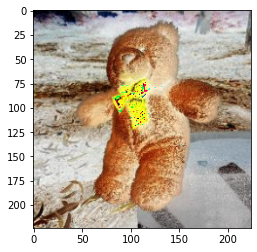

In [262]:
import matplotlib.pyplot as plt
#plt.imshow(images[0].permute(1, 2, 0)  )
from torchvision import transforms
h=transforms.ToPILImage(mode="RGB")(images[1])
plt.imshow(h)

In [0]:
from torchvision import transforms
transform = transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])


In [205]:
for i in range(0,15):
  images[i]=transform(images[i])

print(images)

tensor([[[[ 818.8428,  884.3450,  866.8777,  ...,  211.8559,  216.2227,
            168.1878],
          [ 884.3450,  792.6419,  788.2751,  ...,  198.7554,  224.9563,
            242.4236],
          [ 692.2053,  556.8340,  530.6332,  ...,  251.1572,  268.6245,
            325.3930],
          ...,
          [  67.7511,   72.1179,   80.8515,  ...,  395.2620,  395.2620,
            390.8952],
          [  50.2838,   76.4847,   89.5852,  ...,  408.3624,  408.3624,
            403.9956],
          [  76.4847,  102.6856,   59.0175,  ...,  421.4629,  412.7292,
            412.7292]],

         [[ 819.3929,  881.8929,  846.1786,  ...,  323.8571,  328.3214,
            279.2143],
          [ 881.8929,  783.6786,  770.2857,  ...,  306.0000,  337.2500,
            355.1071],
          [ 681.0000,  538.1428,  506.8928,  ...,  355.1071,  372.9643,
            431.0000],
          ...,
          [  91.7143,   96.1786,  105.1071,  ...,  323.8571,  323.8571,
            323.8571],
          [  69.39

In [0]:
import torch
import torch.nn as nn
from torchvision.models import vgg16
from collections import namedtuple

class Vgg16(torch.nn.Module):
    def __init__(self):
        super(Vgg16, self).__init__()
        model = models.vgg16(pretrained=True)
        for param in model.parameters():
            param.requires_grad = False
        features = list(model.features)
        print(*features,sep='\n')
        print(len(features))
        self.features = nn.ModuleList(features).eval() 
        
    def forward(self, x):
        for ii,model in enumerate(self.features):
            x = model(x)
        return x
            

In [207]:
mymodel=Vgg16()

Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU(inplace=True)
Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU(inplace=True)
MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU(inplace=True)
Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU(inplace=True)
MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU(inplace=True)
Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU(inplace=True)
Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU(inplace=True)
MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU(inplace=True)
Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU(inplace=True

In [0]:
out=mymodel.forward(images)

In [209]:
print(out.size())

torch.Size([16, 512, 7, 7])


In [0]:
from factor_catalog import FactorCatalog
fc=FactorCatalog(9)
heatmaps = fc.fit_predict(out,raw=True)

In [264]:
y=heatmaps.get(224)
print(y.size())

y=torch.argmax(y,1)
print(y.size())

print (y)

torch.Size([16, 9, 224, 224])
torch.Size([16, 224, 224])
tensor([[[3, 3, 3,  ..., 3, 3, 3],
         [3, 3, 3,  ..., 3, 3, 3],
         [3, 3, 3,  ..., 3, 3, 3],
         ...,
         [8, 8, 8,  ..., 6, 6, 6],
         [8, 8, 8,  ..., 6, 6, 6],
         [8, 8, 8,  ..., 6, 6, 6]],

        [[3, 3, 3,  ..., 3, 3, 3],
         [3, 3, 3,  ..., 3, 3, 3],
         [3, 3, 3,  ..., 3, 3, 3],
         ...,
         [8, 8, 8,  ..., 0, 0, 0],
         [8, 8, 8,  ..., 0, 0, 0],
         [8, 8, 8,  ..., 0, 0, 0]],

        [[3, 3, 3,  ..., 2, 2, 2],
         [3, 3, 3,  ..., 2, 2, 2],
         [3, 3, 3,  ..., 2, 2, 2],
         ...,
         [8, 8, 8,  ..., 3, 3, 3],
         [8, 8, 8,  ..., 3, 3, 3],
         [8, 8, 8,  ..., 3, 3, 3]],

        ...,

        [[3, 3, 3,  ..., 3, 3, 3],
         [3, 3, 3,  ..., 3, 3, 3],
         [3, 3, 3,  ..., 3, 3, 3],
         ...,
         [2, 2, 2,  ..., 6, 6, 6],
         [2, 2, 2,  ..., 6, 6, 6],
         [2, 2, 2,  ..., 6, 6, 6]],

        [[3, 3, 3,  ..., 

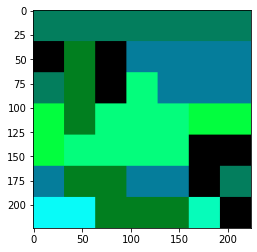

In [266]:
palette = torch.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** 21 - 1])
colors = torch.as_tensor([i for i in range(9)])[:, None] * palette
colors = (colors % 255).numpy().astype("uint8")

# plot the semantic segmentation predictions of 21 classes in each color
r = Image.fromarray(y[1].byte().cpu().numpy())
r.putpalette(colors)

import matplotlib.pyplot as plt
plt.imshow(r)


torch.Size([16, 3, 224, 224])


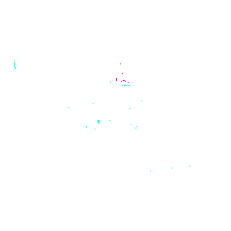

In [214]:
print(images.size())
def imshow(image, ax=None, title=None):
    if ax is None:
        fig, ax = plt.subplots()

    # PyTorch tensors assume the color channel is the first dimension
    # but matplotlib assumes is the third dimension
    image = image.transpose((1, 2, 0))

    # Undo preprocessing
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean

    # Image needs to be clipped between 0 and 1 or it looks like noise when displayed
    image = np.clip(image, 0, 1)

    ax.imshow(image)

    return ax

axs = imshow(images[0].detach().cpu().numpy(), ax = plt)
axs.axis('off')
axs.show()